---
title: "Naïve Bayes"
format: html
---

<b>*Disclaimer - this section is a work in progress</b>
<br></br>


# Introduction to Naive Bayes

Naive Bayes, a widely acclaimed machine learning algorithm, harnesses Bayes' Theorem to categorize data into predefined classes or categories. Praised for its simplicity, swift training capabilities, and robust performance, it stands as a foundational tool in data science. At its core, Bayes' Theorem calculates the probability of event A given the occurrence of event B, expressed as:
$$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$$
Naive Bayes accomplishes classifications by leveraging feature vectors and the principles of Bayes' Theorem to assess values. The 'naive' label in its name stems from its  assumption of independence among predictors, simplifying computational tasks. This algorithm shines in contexts featuring text and categorical data, excelling in applications like spam email identification, sentiment analysis, and document categorization. Despite its seemingly 'naive' premise, Naive Bayes consistently delivers impressive real-world performance, making it a crucial tool for various data science classification tasks.
<br></br>
Common varients of Naive Bayes include Multinomial, Guassian, and Bernoulli Naive Bayes. Multinomial Naive Bayes is the most common variant as is often used for text classification. Gaussian Naive Bayes is appropriate for continuous numerical data while Bernoulli Naive Bayes is a derivation of Multinomial Naive Bayes that is appropriate for binary or boolean data.
<br></br>
The purpose of this page is to implement Naïve Bayes classification on a variety of datasets, some of which may be more for suitable than others for this method. This work is a component of my DSAN 5000 class project.

# Data Preparation

Data must initially be prepared to utilize a Naive Bayes model. Although a substantial part of this process has been covered in the data cleaning and exploratory data analysis (EDA) phases, we must still convert all categorical and label columns into factor types. Additionally, data must be split into training and test subsets. In the following code, we will complete the preparation of the 2021-22 NCAA data and text data for modeling.

### NCAA Data

In [9]:
nova2122 <- read.csv('./data/modified_data/nova2122_updated.csv')

In [10]:
# Load relevant libraries
library(tidyverse)
library(caret)

In [11]:
str(nova2122)

'data.frame':	5399 obs. of  15 variables:
 $ game_id             : int  401365747 401365747 401365747 401365747 401365747 401365747 401365747 401365747 401365747 401365747 ...
 $ play_id             : int  4 7 11 13 16 18 19 21 23 25 ...
 $ half                : int  1 1 1 1 1 1 1 1 1 1 ...
 $ shooter             : chr  "Justin Moore" "Clifton Moore" "Clifton Moore" "Eric Dixon" ...
 $ shot_outcome        : chr  "missed" "missed" "missed" "missed" ...
 $ shooter_team        : chr  "Villanova" "La Salle" "La Salle" "Villanova" ...
 $ shot_outcome_numeric: int  -1 -1 -1 -1 1 1 -1 1 -1 -1 ...
 $ shot_sequence       : int  -1 -1 -2 -1 1 1 -1 1 -1 -1 ...
 $ previous_shots      : int  0 0 -1 0 0 -1 0 0 1 0 ...
 $ lag1                : int  NA NA -1 NA NA -1 NA NA 1 NA ...
 $ lag2                : int  NA NA NA NA NA NA NA NA NA NA ...
 $ lag3                : int  NA NA NA NA NA NA NA NA NA NA ...
 $ lag4                : int  NA NA NA NA NA NA NA NA NA NA ...
 $ lag5                : int  N

In [12]:
nova2122$lag1 <- as.factor(nova2122$lag1)
nova2122$lag2 <- as.factor(nova2122$lag2)
nova2122$lag3 <- as.factor(nova2122$lag3)
nova2122$lag4 <- as.factor(nova2122$lag4)
nova2122$lag5 <- as.factor(nova2122$lag5)
nova2122$lag6 <- as.factor(nova2122$lag6)
nova2122$shot_outcome_numeric <- as.factor(nova2122$shot_outcome_numeric)

In [13]:
str(nova2122)

'data.frame':	5399 obs. of  15 variables:
 $ game_id             : int  401365747 401365747 401365747 401365747 401365747 401365747 401365747 401365747 401365747 401365747 ...
 $ play_id             : int  4 7 11 13 16 18 19 21 23 25 ...
 $ half                : int  1 1 1 1 1 1 1 1 1 1 ...
 $ shooter             : chr  "Justin Moore" "Clifton Moore" "Clifton Moore" "Eric Dixon" ...
 $ shot_outcome        : chr  "missed" "missed" "missed" "missed" ...
 $ shooter_team        : chr  "Villanova" "La Salle" "La Salle" "Villanova" ...
 $ shot_outcome_numeric: Factor w/ 2 levels "-1","1": 1 1 1 1 2 2 1 2 1 1 ...
 $ shot_sequence       : int  -1 -1 -2 -1 1 1 -1 1 -1 -1 ...
 $ previous_shots      : int  0 0 -1 0 0 -1 0 0 1 0 ...
 $ lag1                : Factor w/ 2 levels "-1","1": NA NA 1 NA NA 1 NA NA 2 NA ...
 $ lag2                : Factor w/ 2 levels "-1","1": NA NA NA NA NA NA NA NA NA NA ...
 $ lag3                : Factor w/ 2 levels "-1","1": NA NA NA NA NA NA NA NA NA NA ...
 $ lag4 

In [14]:
# Set a seed for reproducibility
set.seed(137)

# Create an index for splitting the data (70% for training, 30% for validation)
index <- createDataPartition(y = nova2122$shot_outcome_numeric, p = 0.7, list = FALSE)

# Create the training and validation subsets
training_data <- nova2122[index, ]
validation_data <- nova2122[-index, ]

write.csv(training_data, file = "./data/modified_data/nova2122_training.csv", row.names = FALSE)
write.csv(validation_data, file = "./data/modified_data/nova2122_validation.csv", row.names = FALSE)

### News Data

In [ ]:
list_obesity = [str(element) for element in obesity]

print("EXAMPLE: VADAR SENTIMENT COMPUTE")
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

text_list = []
label = []
sentiment_pos = []

for i in range(len(list_obesity)):
    text=list_obesity[i]
    score=sia.polarity_scores(text)
    if "obesity" in text.lower():
        label.append("obesity")
    else:
        if "weight" in text.lower():
            label.append("weight")
        else:
            label.append("neither")
    text_list.append(text)
    sentiment_pos.append(score['pos'])

sentiment_analysis = pd.DataFrame({'text': text_list, 'label': label, 'sentiment_pos': sentiment_pos})
print(sentiment_analysis.tail())

sentiment_analysis.to_csv('sentiment.csv', index=False)

#from sklearn.feature_extraction.text import TfidVectorizer

# Feature Selection

In [1]:
import numpy as np 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sklearn 
import itertools
from scipy.stats import spearmanr

In [2]:
def merit(x, y, correlation='pearson'):
    k = x.shape[1]
    
    if correlation == 'pearson':
        rho_xx = np.mean(np.corrcoef(x, x, rowvar = False))
        rho_xy = np.mean(np.corrcoef(x, y, rowvar = False))
    elif correlation == 'spearman':
        rho_xx = np.mean(spearmanr(x, x, axis = 0)[0])
        rho_xy = np.mean(spearmanr(x, y, axis = 0)[0])
    else:
        raise ValueError("Error: Unsupported Correlation Method. Try Again.")
    
    merit_numerator = k * np.absolute(rho_xy)
    merit_denominator = np.sqrt(k + k * (k - 1) * np.absolute(rho_xx))
    merit_score = merit_numerator / merit_denominator
    
    return merit_score


def maximize_CFS(x, y):
    num_features = x.shape[1]
    max_merit = 0
    optimal_subset = None
    list1 = [*range(0, num_features)]
    for L in range(1, len(list1) + 1):
        for subset in itertools.combinations(list1, L):
            x_subset = x[:, list(subset)]
            subset_merit = merit(x_subset, y)
            if subset_merit > max_merit:
                max_merit = subset_merit
                optimal_subset = list(subset)
    return optimal_subset  # Return the indices of selected features

### NCAA Data

In [3]:
training = pd.read_csv('./data/modified_data/nova2122_training.csv')
validation = pd.read_csv('./data/modified_data/nova2122_validation.csv')

# Convert DataFrames to numpy arrays
x = training[['lag1', 'lag2', 'lag3']].values
x = np.nan_to_num(x, nan=0)
y = training[['shot_outcome_numeric']].values

selected_indices = maximize_CFS(x, y)
print(selected_indices)

[0]


In [4]:
z = training['lag1'].values
z = np.nan_to_num(x, nan=0)

merit(z,y)

0.3818269784940867

An output of [0] in the above code indicates that, according to the Correlation-based Feature Selection (CFS) algorithm, the optimal subset comprises only the 'lag1' feature. This suggests that, under the criteria applied, 'lag1' provides the most valuable information for classifying the 'shot_outcome_numeric' variable.

'lag2' and 'lag3' are considered less informative for predicting 'shot_outcome_numeric' using this particular feature selection approach and correlation-based merit score.

Additionally, a merit score of 0.3818 indicates a moderate positive correlation between the 'lag1' feature and 'shot_outcome_numeric,' suggesting that 'lag1' contains relevant information for predicting the target variable.

### News Data

# Naive Bayes with Labeled Record Data

In [15]:
nova2122_training <- read.csv("./data/modified_data/nova2122_training.csv")
nova2122_validation <- read.csv('./data/modified_data/nova2122_validation.csv')

In [17]:
# Load the e1071 package
library(e1071)

# Load your training and validation data
nova2122_training <- read.csv("./data/modified_data/nova2122_training.csv")
nova2122_validation <- read.csv('./data/modified_data/nova2122_validation.csv')

nova2122_training$lag1 <- as.factor(nova2122_training$lag1)
nova2122_training$shot_outcome_numeric <- as.factor(nova2122_training$shot_outcome_numeric)
nova2122_validation$lag1 <- as.factor(nova2122_validation$lag1)
nova2122_validation$shot_outcome_numeric <- as.factor(nova2122_validation$shot_outcome_numeric)

# Create a Naive Bayes model
nb_model <- naiveBayes(shot_outcome_numeric ~ lag1, data = nova2122_training)

# Make predictions on the validation set
validation_predictions <- predict(nb_model, nova2122_validation, type = "class")

# Assess the accuracy of the model
accuracy <- mean(validation_predictions == nova2122_validation$shot_outcome_numeric)
cat("Accuracy of the Naive Bayes model:", accuracy, "\n")


Accuracy of the Naive Bayes model: 0.5463535 


In [18]:
# Create a confusion matrix
conf_matrix <- confusionMatrix(data = validation_predictions, reference = nova2122_validation$shot_outcome_numeric)

# Print the confusion matrix
print(conf_matrix)

Confusion Matrix and Statistics

          Reference
Prediction  -1   1
        -1 476 400
        1  334 408
                                          
               Accuracy : 0.5464          
                 95% CI : (0.5217, 0.5708)
    No Information Rate : 0.5006          
    P-Value [Acc > NIR] : 0.0001276       
                                          
                  Kappa : 0.0926          
                                          
 Mcnemar's Test P-Value : 0.0164312       
                                          
            Sensitivity : 0.5877          
            Specificity : 0.5050          
         Pos Pred Value : 0.5434          
         Neg Pred Value : 0.5499          
             Prevalence : 0.5006          
         Detection Rate : 0.2942          
   Detection Prevalence : 0.5414          
      Balanced Accuracy : 0.5463          
                                          
       'Positive' Class : -1              
                              

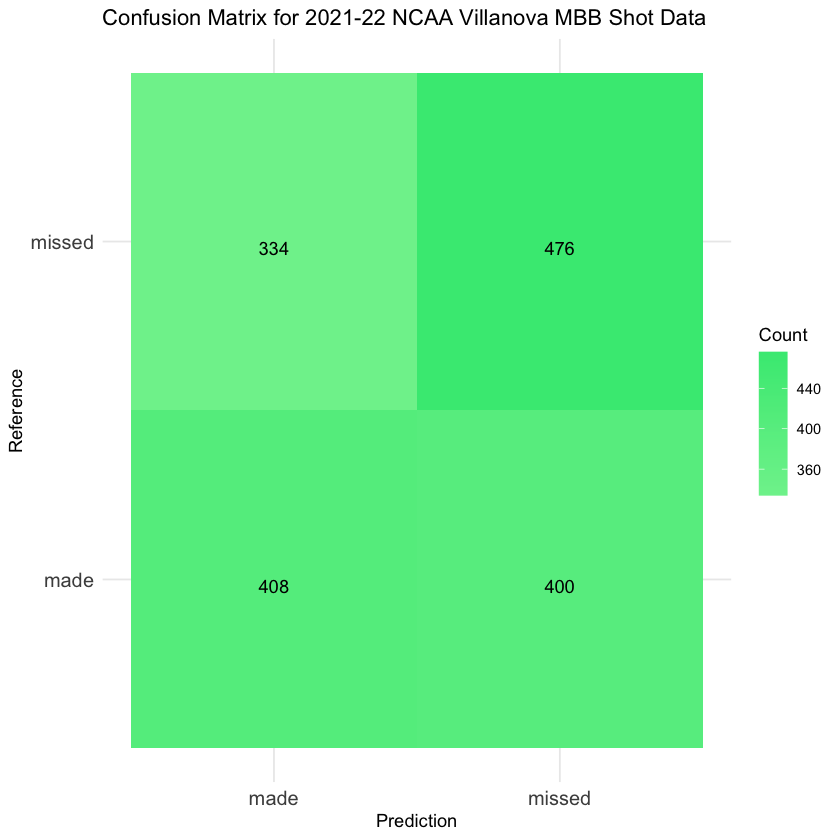

In [28]:
#using ggplot

# Create the confusion matrix data
conf_matrix_data <- data.frame(
  Prediction = c("missed", "made", "missed", "made"),
  Reference = c("missed", "missed", "made", "made"),
  Count = c(476, 334, 400, 408)
)

# Create the ggplot
gg <- ggplot(data = conf_matrix_data, aes(x = Prediction, y = Reference)) +
  geom_tile(aes(fill = Count)) +
  geom_text(aes(label = Count), vjust = 1) +
  scale_fill_gradient(low = "#7cf09b", high = "#3ee882") +
  labs(
    x = "Prediction",
    y = "Reference",
    fill = "Count"
  ) +
  theme_minimal() +
  theme(axis.text = element_text(size = 12))

gg + ggtitle("Confusion Matrix for 2021-22 NCAA Villanova MBB Shot Data")

I tried applying Naive Bayes to my time series data. Since it is time series data, the procedures for classifications models like Naive Bayes are not suitable for a scenario like this.

# Naive Bayes with Labeled Text Data

# Extra Joke

Are monsters good at math? Not unless you Count Dracula.

What’s the official animal of Pi day? The Pi-thon!

What do you call a number that can’t sit still? A roamin’ numeral!